Código utilizado para validar o comportamento de um controlador fuzzy PD para controle de nível de um reservatório.

A função calculaPotencia() descreve a lógica embarcada no CLP responsável pelo controle.

O pacote skfuzzy foi utilizado para comparar o método do centroide com a média ponderada e a média ponderada dos máximos

In [ ]:
!python3 -m pip install scikit-fuzzy

In [38]:
def calculaPotencia(erro, deltaErro, toleranciaErro, toleranciaDeltaErro):

  """ Função de Pertinência do Erro """

  MNE, PNE, ZEE, PPE, MPE = 0, 0, 0, 0, 0

  if (erro <= (-2 * toleranciaErro)):
    MNE = 1
  elif (erro > (-2 * toleranciaErro)) and (erro <= -toleranciaErro):
    MNE = -(erro + toleranciaErro) / toleranciaErro
    PNE = 1 - MNE
  elif (erro > -toleranciaErro) and (erro <= 0):
    ZEE = (erro + toleranciaErro) / toleranciaErro
    PNE = 1 - ZEE
  elif (erro > 0) and (erro <= toleranciaErro):
    PPE = erro / toleranciaErro
    ZEE = 1 - PPE
  elif (erro > toleranciaErro) and (erro <= (2 * toleranciaErro)):
    MPE = (erro - toleranciaErro) / toleranciaErro
    PPE = 1 - MPE
  elif (erro > (2 * toleranciaErro)):
    MPE = 1


  """ Função de Pertinência do Delta Erro """

  MNDE, PNDE, ZEDE, PPDE, MPDE = 0, 0, 0, 0, 0

  if (deltaErro <= (-2 * toleranciaDeltaErro)) :
    MNDE = 1
  elif (deltaErro > (-2 * toleranciaDeltaErro)) and (deltaErro <= -toleranciaDeltaErro) :
    PNDE = (deltaErro + 2 * toleranciaDeltaErro) / toleranciaDeltaErro
    MNDE = 1 - PNDE
  elif (deltaErro > -toleranciaDeltaErro) and (deltaErro <= 0) :
    ZEDE = (deltaErro + toleranciaDeltaErro) / toleranciaDeltaErro
    PNDE = 1 - ZEDE
  elif (deltaErro > 0) and (deltaErro <= toleranciaDeltaErro) :
    PPDE = deltaErro / toleranciaDeltaErro
    ZEDE = 1 - PPDE
  elif (deltaErro > toleranciaDeltaErro) and (deltaErro <= (2 * toleranciaDeltaErro)) :
      MPDE = (deltaErro - toleranciaDeltaErro) / toleranciaDeltaErro
      PPDE = 1 - MPDE
  elif (deltaErro > (2 * toleranciaDeltaErro)) :
      MPDE = 1


  """ REGRAS """

  PMA1_F, PA1_F, PM1_F, PB1_F, PMB1_F = 0, 0, 0, 0, 0
  PMA2_F, PA2_F, PM2_F, PB2_F, PMB2_F = 0, 0, 0, 0, 0

  """ Linha 1 """
  if (MNE != 0) and (MNDE != 0):
    PMA1_F = max(PMA1_F, min(MNE, MNDE))
    PMA2_F += min(MNE, MNDE)
  if (PNE != 0) and (MNDE != 0):
    PM1_F = max(PM1_F, min(PNE, MNDE))
    PM2_F += min(PNE, MNDE)
  if (ZEE != 0) and (MNDE != 0):
    PB1_F = max(PB1_F, min(ZEE, MNDE))
    PB2_F += min(ZEE, MNDE)
  if (PPE != 0) and (MNDE != 0):
    PB1_F = max(PB1_F, min(PPE, MNDE))
    PB2_F += min(PPE, MNDE)
  if (MPE != 0) and (MNDE != 0):
    PB1_F = max(PB1_F, min(MPE, MNDE))
    PB2_F += min(MPE, MNDE)

  """ Linha 2 """
  if (MNE != 0) and (PNDE != 0):
    PA1_F = max(PA1_F, min(MNE, PNDE))
    PA2_F += min(MNE, PNDE)
  if (PNE != 0) and (PNDE != 0):
    PM1_F = max(PM1_F, min(PNE, PNDE))
    PM2_F += min(PNE, PNDE)
  if (ZEE != 0) and (PNDE != 0):
    PB1_F = max(PB1_F, min(ZEE, PNDE))
    PB2_F += min(ZEE, PNDE)
  if (PPE != 0) and (PNDE != 0):
    PB1_F = max(PB1_F, min(PPE, PNDE))
    PB2_F += min(PPE, PNDE)
  if (MPE != 0) and (PNDE != 0) :
    PMB1_F = max(PMB1_F, min (MPE, PNDE))
    PMB2_F += min(MPE, PNDE)

  """ Linha 3 """
  if (MNE != 0) and (ZEDE != 0):
    PMA1_F = max(PMA1_F, min(MNE, ZEDE))
    PMA2_F += min(MNE, ZEDE)
  if (PNE != 0) and (ZEDE != 0):
    PA1_F = max(PA1_F, min(PNE, ZEDE))
    PA2_F += min(PNE, ZEDE)
  if (ZEE != 0) and (ZEDE != 0):
    PM1_F = max(PM1_F, min(ZEE, ZEDE))
    PM2_F += min(ZEE, ZEDE)
  if (PPE != 0) and (ZEDE != 0):
    PB1_F = max(PB1_F, min(PPE, ZEDE))
    PB2_F += min(PPE, ZEDE)
  if (MPE != 0) and (ZEDE != 0):
    PMB1_F = max(PMB1_F, min(MPE, ZEDE))
    PMB2_F += min(MPE, ZEDE)

  """ Linha 4 """
  if (MNE != 0) and (PPDE != 0):
    PA1_F = max(PA1_F, min(MNE, PPDE))
    PA2_F += min(MNE, PPDE)
  if (PNE != 0) and (PPDE != 0):
    PM1_F = max(PM1_F, min(PNE, PPDE))
    PM2_F += min(PNE, PPDE)
  if (ZEE != 0) and (PPDE != 0):
    PB1_F = max(PB1_F, min(ZEE, PPDE))
    PB2_F += min(ZEE, PPDE)
  if (PPE != 0) and (PPDE != 0):
    PB1_F = max(PB1_F, min(PPE, PPDE))
    PB2_F += min(PPE, PPDE)
  if (MPE != 0) and (PPDE != 0):
    PMB1_F = max(PMB1_F, min(MPE, PPDE))
    PMB2_F += min(MPE, PPDE)

  """ Linha 5 """
  if (MNE != 0) and (MPDE != 0):
    PA1_F = max(PA1_F, min(MNE, MPDE))
    PA2_F += min(MNE, MPDE)
  if (PNE != 0) and (MPDE != 0):
    PM1_F = max(PM1_F, min(PNE, MPDE))
    PM2_F += min(PNE, MPDE)
  if (ZEE != 0) and (MPDE != 0):
    PB1_F = max(PB1_F, min(ZEE, MPDE))
    PB2_F += min(ZEE, MPDE)
  if (PPE != 0) and (MPDE != 0):
    PB1_F = max(PB1_F, min(PPE, MPDE))
    PB2_F += min(PPE, MPDE)
  if (MPE != 0) and (MPDE != 0):
    PMB1_F = max(PMB1_F, min(MPE, MPDE))
    PMB2_F += min(MPE, MPDE)

  # print(PMB_F + PB_F + PM_F + PA_F + PMA_F)

  P1 = ((8.33 * PMB1_F) + (25.0 * PB1_F) + (50.0 * PM1_F) + (75.0 * PA1_F) + (91.66 * PMA1_F)) / (PMB1_F + PB1_F + PM1_F + PA1_F + PMA1_F)
  P2 = ((8.33 * PMB2_F) + (25.0 * PB2_F) + (50.0 * PM2_F) + (75.0 * PA2_F) + (91.66 * PMA2_F)) / (PMB2_F + PB2_F + PM2_F + PA2_F + PMA2_F)

  return P1, P2

In [39]:
import skfuzzy as fuzz
import skfuzzy.control as sys
import numpy as np

toleranciaErro = 5.5
emax, emin = 200, -200
e = np.arange(emin, emax, 0.1)

toleranciaDeltaErro = 0.1
demax, demin = 1, -1
de = np.arange(demin, demax, 0.1)

erro = sys.Antecedent(e, 'erro')
deltaErro = sys.Antecedent(de, 'deltaErro')
potencia = sys.Consequent(np.arange(0, 100, 0.1), 'potencia')

# Funções de pertinência do erro

erro['MNE'] = fuzz.trapmf(erro.universe, [emin, emin, -2 * toleranciaErro, -toleranciaErro])
erro['PNE'] = fuzz.trimf(erro.universe, [-2*toleranciaErro, -toleranciaErro, 0])
erro['ZE'] = fuzz.trimf(erro.universe, [-toleranciaErro, 0, toleranciaErro])
erro['PPE'] = fuzz.trimf(erro.universe, [0, toleranciaErro, 2 * toleranciaErro])
erro['MPE'] = fuzz.trapmf(erro.universe, [toleranciaErro, 2 * toleranciaErro, emax, emax])

# Funções de pertinência do erro

deltaErro['MNDE'] = fuzz.trapmf(deltaErro.universe, [demin, demin, -2 * toleranciaDeltaErro, -toleranciaDeltaErro])
deltaErro['PNDE'] = fuzz.trimf(deltaErro.universe, [-2*toleranciaDeltaErro, -toleranciaDeltaErro, 0])
deltaErro['ZDE'] = fuzz.trimf(deltaErro.universe, [-toleranciaDeltaErro, 0, toleranciaDeltaErro])
deltaErro['PPDE'] = fuzz.trimf(deltaErro.universe, [0, toleranciaDeltaErro, 2 * toleranciaDeltaErro])
deltaErro['MPDE'] = fuzz.trapmf(deltaErro.universe, [toleranciaDeltaErro, 2 * toleranciaDeltaErro, demax, demax])

# Funções de pertinência dos conjuntos da saída

potencia['MB'] = fuzz.trimf(potencia.universe, [0, 0, 25])
potencia['B'] = fuzz.trimf(potencia.universe, [0, 25, 50])
potencia['M'] = fuzz.trimf(potencia.universe, [25, 50, 75])
potencia['A'] = fuzz.trimf(potencia.universe, [50, 75, 100])
potencia['MA'] = fuzz.trimf(potencia.universe, [75, 100, 100])

# Base de regras

baseRegras = []
sintonia = ['MA', 'M', 'B', 'B', 'B',
            'A', 'M', 'B', 'B', 'MB',
            'MA', 'A', 'M', 'B', 'MB',
            'A', 'M', 'B', 'B', 'MB',
            'A', 'M', 'B', 'B', 'MB',]

counter = 0
for deltaErrors in deltaErro.terms:
  for errors in erro.terms:
    baseRegras.append(sys.Rule(deltaErro[deltaErrors] & erro[errors], potencia[sintonia[counter]]))
    counter += 1

regras = sys.ControlSystem(baseRegras)
controlador = sys.ControlSystemSimulation(regras)

sp = 50.0
pvAnterior = 0
niveis = np.arange(0, 100, 0.3)

pMaxPonderado, pMediaPonderada, pSkfuzzy = [], [], []

for pvAtual in niveis:
  er = pvAtual - sp
  der = pvAtual - pvAnterior

  pot1, pot2 = calculaPotencia(er, der, toleranciaErro, toleranciaDeltaErro)
  pMaxPonderado.append(pot1)
  pMediaPonderada.append(pot2)

  controlador.input['erro'] = er
  controlador.input['deltaErro'] = der
  controlador.compute()

  pot3 = controlador.output['potencia']
  pSkfuzzy.append(pot3)

  pvAnterior = pvAtual

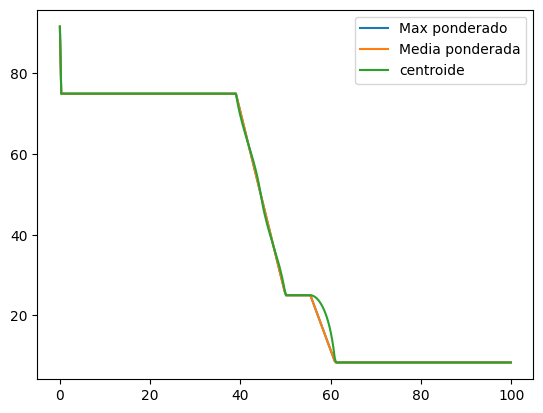

In [40]:
import matplotlib.pyplot as plt

pMaxPonderado = np.array(pMaxPonderado)
pMediaPonderada = np.array(pMediaPonderada)
pSkfuzzy = np.array(pSkfuzzy)

diffMaxPonderado = pSkfuzzy - pMaxPonderado
diffMediaPonderada = pSkfuzzy - pMediaPonderada

# plt.plot(niveis, diffMaxPonderado, niveis, diffMediaPonderada)
# plt.legend(['Média ponderada máx','Média ponderada'])

plt.plot(niveis, pMaxPonderado, niveis, pMediaPonderada, niveis, pSkfuzzy)
plt.legend(['Max ponderado','Media ponderada', 'centroide'])

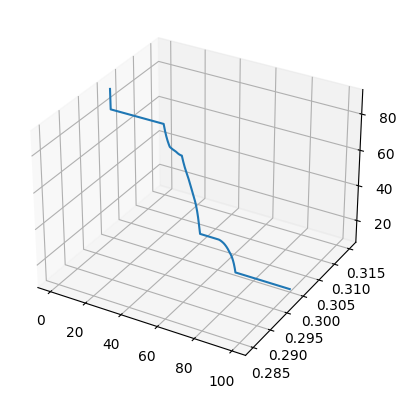

In [5]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(niveis, [0.3]*len(niveis), zs=pSkfuzzy, zdir='z', label='curve in (x, y)')